In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv",parse_dates=['date_time'])

In [3]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917526,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,154.34,1
9917527,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9917528,665574,2013-05-21 11:06:37,24,216,NaN,NaN,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


### PREPROCESSING

In [4]:
print("Number of unique search ids in original dataset: " +str(len(train['srch_id'].unique())))

Number of unique search ids in original dataset: 399344


#### Missing Values (Drop Columns)

In [5]:
print("Percentage of Null Values for each Feature")
train.isnull().sum()*100/len(train)

Percentage of Null Values for each Feature


srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.905012
visitor_hist_adr_usd           94.881669
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.147517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.964945
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affin

Text(0, 0.5, 'Feature')

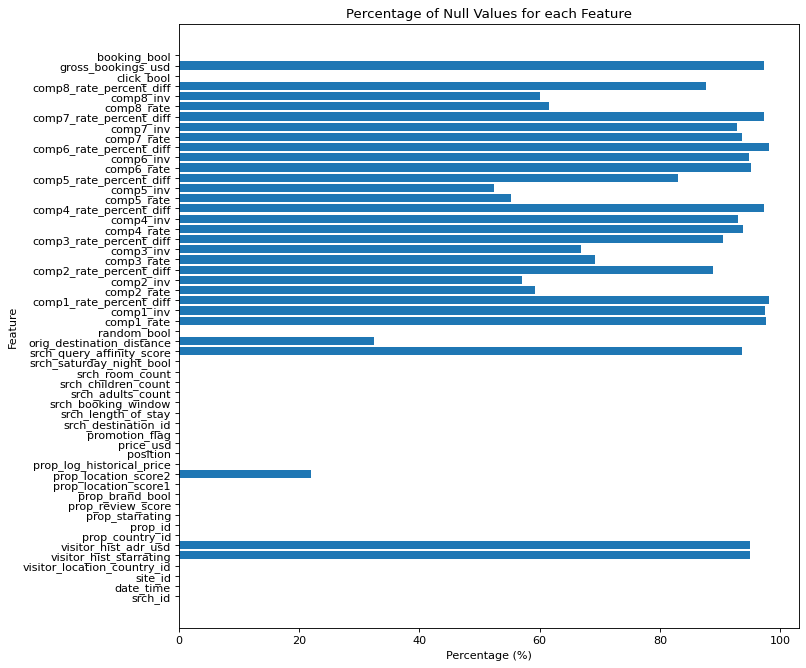

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10), dpi=80)
s=train.isnull().sum()*100/len(train)
plt.barh(s.index, s.values)
plt.title("Percentage of Null Values for each Feature")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")

In [7]:
drop_columns= []
limit=0.8
dataset_samples=len(train)
dataset_columns=list(train.columns)

for i in range(len(train.columns)):
    nans = sum(train.iloc[:, i].isnull())
    if (nans/dataset_samples) > limit:
        drop_columns.append(dataset_columns[i])

print("Columns to Drop (More than 80% Missing Values)")
print(*drop_columns,sep='\n')

train_new = train.drop(labels=drop_columns, axis=1)

Columns to Drop (More than 80% Missing Values)
visitor_hist_starrating
visitor_hist_adr_usd
srch_query_affinity_score
comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate_percent_diff
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate_percent_diff
gross_bookings_usd


In [8]:
print("Percentage of Null Values for Features left")
train_new.isnull().sum()*100/len(train_new)

Percentage of Null Values for Features left


srch_id                         0.000000
date_time                       0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.147517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.964945
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
orig_destination_distance      32.432077
random_bool                     0.000000
comp2_rate      

#### Feature Transformation

In [9]:
train_new['year'] = pd.DatetimeIndex(train_new['date_time']).year
train_new['month'] = pd.DatetimeIndex(train_new['date_time']).month
train_new['day'] = pd.DatetimeIndex(train_new['date_time']).day
train_new=train_new.drop(['date_time'], axis=1)

#### Missing Values (Impute Values)

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

train_new.replace('nan',np.NaN,inplace=True)
imp=SimpleImputer(missing_values=np.NaN,strategy='mean') #Or strategy='most_frequent'

train_imp=pd.DataFrame(imp.fit_transform(train_new))
train_imp.columns=train_new.columns
train_imp.index=train_new.index

train_new=train_imp

#### Dimensionality Reduction (Variance Threshold)

In [11]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=1)
train_reduced_var=selector.fit_transform(train_new)
mask=selector.get_support()
concol=[column for column in train_new.columns if column not in train_new.columns[mask]]
print('Columns to Delete with Variance Threshold (threshold=1)' )
print(*concol,sep='\n')

Columns to Delete with Variance Threshold (threshold=1)
prop_brand_bool
prop_location_score2
promotion_flag
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
random_bool
comp2_rate
comp2_inv
comp3_rate
comp3_inv
comp5_rate
comp5_inv
comp8_rate
comp8_inv
click_bool
booking_bool
year


In [12]:
print("Percentage of Null Values for Final Features")
train_new.isnull().sum()*100/len(train_new)

Percentage of Null Values for Final Features


srch_id                        0.0
site_id                        0.0
visitor_location_country_id    0.0
prop_country_id                0.0
prop_id                        0.0
prop_starrating                0.0
prop_review_score              0.0
prop_brand_bool                0.0
prop_location_score1           0.0
prop_location_score2           0.0
prop_log_historical_price      0.0
position                       0.0
price_usd                      0.0
promotion_flag                 0.0
srch_destination_id            0.0
srch_length_of_stay            0.0
srch_booking_window            0.0
srch_adults_count              0.0
srch_children_count            0.0
srch_room_count                0.0
srch_saturday_night_bool       0.0
orig_destination_distance      0.0
random_bool                    0.0
comp2_rate                     0.0
comp2_inv                      0.0
comp3_rate                     0.0
comp3_inv                      0.0
comp5_rate                     0.0
comp5_inv           

#### Data selection

In [13]:
train_new['class'] = train_new['click_bool']

In [14]:
selected_ids = np.random.choice(train_new.srch_id.unique(),round(len(train_new.srch_id.unique())*0.6),replace = False)
train_new = train_new[train_new.srch_id.isin(selected_ids)]

In [15]:
print('Percentage of samples from original dataset left: ' + str(len(train_new)/len(train)))

Percentage of samples from original dataset left: 0.6001417691703479


In [16]:
train_new=train_new.sort_index(axis = 0)

In [17]:
from sklearn.model_selection import GroupShuffleSplit
splitter = GroupShuffleSplit(test_size=.30, n_splits=2, random_state = 7)
split = splitter.split(train_new, groups=train_new['srch_id'])
train_inds, test_inds = next(split)

df1 = train_new.iloc[train_inds]
df2 = train_new.iloc[test_inds]

train_set=df1.loc[:,df1.columns!='class']
train_labels=df1['class']
train_set=train_set.drop(['booking_bool','click_bool'], axis=1)

test_set=df2.loc[:,df2.columns!='class']
test_labels=df2['class']

#### Imbalanced Data (OverSampling)

In [18]:
from collections import Counter
print("Percentage of samples for each class before OverSampling")
c=Counter(train_labels)
print([(i, c[i] / len(train_labels) * 100.0) for i in c])

Percentage of samples for each class before OverSampling
[(0.0, 95.53233148320508), (1.0, 4.467668516794919)]


In [19]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=0)
train_set, train_labels = ros.fit_resample(train_set, train_labels)

In [20]:
print("Percentage of samples for each class after OverSampling")
c=Counter(train_labels)
print([(i, c[i] / len(train_labels) * 100.0) for i in c])

Percentage of samples for each class after OverSampling
[(0.0, 50.0), (1.0, 50.0)]


In [21]:
print("Number of unique search ids in final train set: " +str(len(train_set.srch_id.unique())))
print("Number of features in final train set: " +str(len(train_set.columns)))
print("Number of samples in final train set: " +str(len(train_set)))

Number of unique search ids in final train set: 167724
Number of features in final train set: 34
Number of samples in final train set: 7960820


In [22]:
print('Features left on Final Train Set' )
print(*train_set.columns,sep='\n')

Features left on Final Train Set
srch_id
site_id
visitor_location_country_id
prop_country_id
prop_id
prop_starrating
prop_review_score
prop_brand_bool
prop_location_score1
prop_location_score2
prop_log_historical_price
position
price_usd
promotion_flag
srch_destination_id
srch_length_of_stay
srch_booking_window
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
orig_destination_distance
random_bool
comp2_rate
comp2_inv
comp3_rate
comp3_inv
comp5_rate
comp5_inv
comp8_rate
comp8_inv
year
month
day


#### Dimensionality Reduction (PCA)

In [23]:
from sklearn.decomposition import PCA

n = 30
pca = PCA(n_components=n)

train_set_pca = pca.fit_transform(train_set)
test_set_pca = pca.transform(test_set.drop(['booking_bool','click_bool'], axis=1))

In [24]:
predictions={}
accuracy={}
f1score={}
ndcg={}

### NDCG SCORE

In [25]:
import numpy as np
from sklearn.metrics import ndcg_score
import math


def calculate_ideal_dcg_score(subsetdf):
    optimum_sorting = subsetdf.sort_values(['relevance_score'], ascending=False)['relevance_score'].tolist()
    DCG = 0
    position = 1
    for score in optimum_sorting:
        DCG += (math.pow(2,score) - 1) / math.log(position + 1, 2)
        position += 1
    return DCG

def calculate_dcg_score(subsetdf):
    sorting = subsetdf.sort_values(['pred'], ascending=False)['relevance_score'].tolist()
    # Calculate the DCG
    DCG = 0
    position = 1
    for score in sorting:
        DCG += (math.pow(2,score) - 1) / math.log(position + 1, 2)
        position += 1
    return DCG


def ndcg_calc(predictions,test_labels):
    df = test_set.assign(real=test_labels.values)
    df = df.assign(pred=predictions)
    summ=0
    total=0
    for df2 in df.groupby(['srch_id']):
        df1=df2[1]
        if (len(df1)>1):
            df1['relevance_score']=0
            for i in range(len(df1)):
                if df1.iloc[i]['booking_bool']==1:
                    df1.iloc[i, df1.columns.get_loc('relevance_score')] = 5
                elif df1.iloc[i]['click_bool']==1:
                    df1.iloc[i, df1.columns.get_loc('relevance_score')] = 1
            
            idcg = calculate_ideal_dcg_score(df1)
            if idcg > 0:
                obtained_score = calculate_dcg_score(df1)
                NDCG = float(obtained_score) / float(idcg)
                summ+=NDCG
                total=total+1
    result=summ/total
    return result

### METHODS

#### Gaussian Naive Bayes (GNB)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score, f1_score

gnb = GaussianNB()
model = gnb.fit(train_set_pca, train_labels)
predictions['Gaussian Naive Bayes']=gnb.predict(test_set_pca)

print (classification_report(test_labels, predictions['Gaussian Naive Bayes']))
accuracy['Gaussian Naive Bayes']=accuracy_score(test_labels, predictions['Gaussian Naive Bayes'])
f1score['Gaussian Naive Bayes']=f1_score(test_labels,predictions['Gaussian Naive Bayes'],average='macro',zero_division=0)
ndcg['Gaussian Naive Bayes']=ndcg_calc(predictions['Gaussian Naive Bayes'],test_labels)
print("NDCG score = " + str(ndcg['Gaussian Naive Bayes']))

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75   1705436
         1.0       0.08      0.75      0.15     79930

    accuracy                           0.61   1785366
   macro avg       0.53      0.67      0.45   1785366
weighted avg       0.94      0.61      0.72   1785366

NDCG score = 0.4039092382196658


<AxesSubplot:>

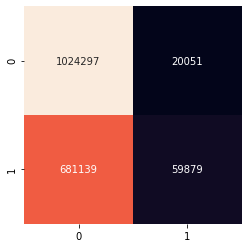

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(test_labels, predictions['Gaussian Naive Bayes'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
model = lr.fit(train_set_pca, train_labels)
predictions['Logistic Regression']=lr.predict(test_set_pca)

print (classification_report(test_labels, predictions['Logistic Regression']))
accuracy['Logistic Regression']=accuracy_score(test_labels, predictions['Logistic Regression'])
f1score['Logistic Regression']=f1_score(test_labels,predictions['Logistic Regression'],average='macro',zero_division=0)
ndcg['Logistic Regression']=ndcg_calc(predictions['Logistic Regression'],test_labels)
print("NDCG score = " + str(ndcg['Logistic Regression']))

              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75   1705436
         1.0       0.08      0.74      0.15     79930

    accuracy                           0.62   1785366
   macro avg       0.53      0.68      0.45   1785366
weighted avg       0.94      0.62      0.72   1785366

NDCG score = 0.4050962760424247


<AxesSubplot:>

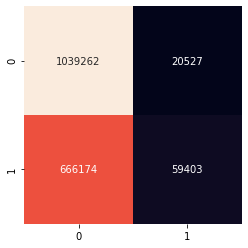

In [29]:
mat=confusion_matrix(test_labels, predictions['Logistic Regression'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

#### K-Nearest Neighbors (Knn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model=knn.fit(train_set_pca, train_labels)
predictions['K Nearest Neighbors']=knn.predict(test_set_pca)

print (classification_report(test_labels, predictions['K Nearest Neighbors']))
accuracy['K Nearest Neighbors']=accuracy_score(test_labels, predictions['K Nearest Neighbors'])
f1score['K Nearest Neighbors']=f1_score(test_labels,predictions['K Nearest Neighbors'],average='macro',zero_division=0)
ndcg['K Nearest Neighbors']=ndcg_calc(predictions['K Nearest Neighbors'],test_labels)
print("NDCG score = " + str(ndcg['K Nearest Neighbors']))

In [ ]:
mat=confusion_matrix(test_labels, predictions['K Nearest Neighbors'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

#### Multi-Layer Perceptron (MLP)

In [30]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
model=clf.fit(train_set_pca, train_labels)
predictions['Multi-Layer Perceptron'] = clf.predict(test_set_pca)

print (classification_report(test_labels, predictions['Multi-Layer Perceptron'], zero_division=0))
accuracy['Multi-Layer Perceptron']=accuracy_score(test_labels, predictions['Multi-Layer Perceptron'])
f1score['Multi-Layer Perceptron']=f1_score(test_labels,predictions['Multi-Layer Perceptron'],average='macro',zero_division=0)
ndcg['Multi-Layer Perceptron']=ndcg_calc(predictions['Multi-Layer Perceptron'],test_labels)
print("NDCG score = " + str(ndcg['Multi-Layer Perceptron']))

              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85   1705436
         1.0       0.10      0.60      0.17     79930

    accuracy                           0.75   1785366
   macro avg       0.54      0.68      0.51   1785366
weighted avg       0.94      0.75      0.82   1785366

NDCG score = 0.43177258628129767


<AxesSubplot:>

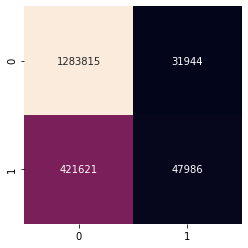

In [31]:
mat=confusion_matrix(test_labels, predictions['Multi-Layer Perceptron'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

#### Support Vector Machines (SVM)

In [ ]:
from sklearn import svm

clf = svm.SVC()
model=clf.fit(train_set_pca, train_labels)
predictions['Support Vector Machines'] = clf.predict(test_set_pca)

print (classification_report(test_labels, predictions['Support Vector Machines'], zero_division=0))
accuracy['Support Vector Machines']=accuracy_score(test_labels, predictions['Support Vector Machines'])
f1score['Support Vector Machines']=f1_score(test_labels,predictions['Support Vector Machines'],average='macro',zero_division=0)
ndcg['Support Vector Machines']=ndcg_calc(predictions['Support Vector Machines'],test_labels)
print("NDCG score = " + str(ndcg['Support Vector Machines']))

In [ ]:
mat=confusion_matrix(test_labels, predictions['Support Vector Machines'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
model=clf.fit(train_set_pca, train_labels)
predictions['Random Forest']=clf.predict(test_set_pca)

print (classification_report(test_labels, predictions['Random Forest'], zero_division=0))
accuracy['Random Forest']=accuracy_score(test_labels, predictions['Random Forest'])
f1score['Random Forest']=f1_score(test_labels,predictions['Random Forest'],average='macro',zero_division=0)
ndcg['Random Forest']=ndcg_calc(predictions['Random Forest'],test_labels)
print("NDCG score = " + str(ndcg['Random Forest']))

              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82   1705436
         1.0       0.09      0.67      0.16     79930

    accuracy                           0.70   1785366
   macro avg       0.54      0.68      0.49   1785366
weighted avg       0.94      0.70      0.79   1785366

NDCG score = 0.4196148250310314


<AxesSubplot:>

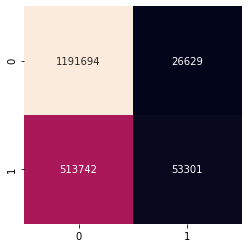

In [34]:
mat=confusion_matrix(test_labels, predictions['Random Forest'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

Text(0, 0.5, 'Features')

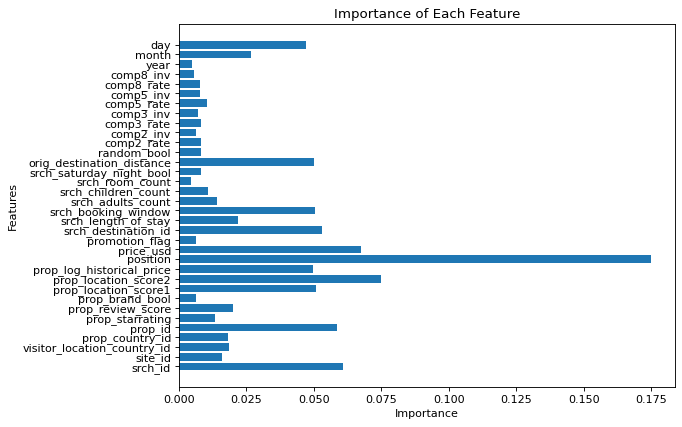

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(train_set.columns, clf.feature_importances_)
plt.title("Importance of Each Feature")
plt.xlabel('Importance')
plt.ylabel('Features')

#### AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model=ada.fit(train_set_pca, train_labels)
predictions['Ada Boost']=ada.predict(test_set_pca)

print (classification_report(test_labels, predictions['Ada Boost'], zero_division=0))
accuracy['Ada Boost']=accuracy_score(test_labels, predictions['Ada Boost'])
f1score['Ada Boost']=f1_score(test_labels,predictions['Ada Boost'],average='macro',zero_division=0)
ndcg['Ada Boost']=ndcg_calc(predictions['Ada Boost'],test_labels)
print("NDCG score = " + str(ndcg['Ada Boost']))

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82   1705436
         1.0       0.10      0.66      0.17     79930

    accuracy                           0.71   1785366
   macro avg       0.54      0.69      0.50   1785366
weighted avg       0.94      0.71      0.79   1785366

NDCG score = 0.4271800813871368


<AxesSubplot:>

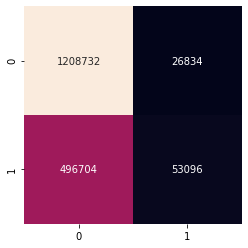

In [39]:
mat=confusion_matrix(test_labels, predictions['Ada Boost'])
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)

### RESULTS - PLOTS

#### Accuracy

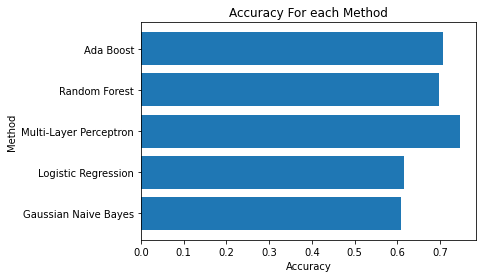

In [40]:
accuracy_names = list(accuracy.keys())
accuracy_values = list(accuracy.values())

plt.barh(range(len(accuracy)), accuracy_values, tick_label=accuracy_names)
plt.title('Accuracy For each Method')
plt.xlabel('Accuracy')
plt.ylabel('Method')

plt.show()

In [41]:
print('Accuracy Values' )
for key, value in accuracy.items():
    print(key, ' : ', value)

Accuracy Values
Gaussian Naive Bayes  :  0.607256999405164
Logistic Regression  :  0.6153724222372331
Multi-Layer Perceptron  :  0.7459540508780833
Random Forest  :  0.6973332078688628
Ada Boost  :  0.7067615267681808


#### F1-score

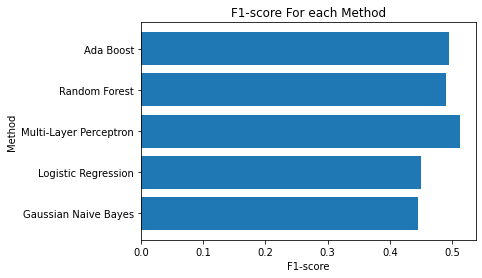

In [42]:
f1score_names = list(f1score.keys())
f1score_values = list(f1score.values())

plt.barh(range(len(f1score)), f1score_values, tick_label=f1score_names)
plt.title('F1-score For each Method')
plt.xlabel('F1-score')
plt.ylabel('Method')

plt.show()

In [43]:
print('F1-Score Values' )
for key, value in f1score.items():
    print(key, ' : ', value)

F1-Score Values
Gaussian Naive Bayes  :  0.4454397409251112
Logistic Regression  :  0.44957880828966834
Multi-Layer Perceptron  :  0.5122569403157282
Random Forest  :  0.4899748816399052
Ada Boost  :  0.495308760413967


#### Normalized Discounted Cumulative Gain (NDCG)

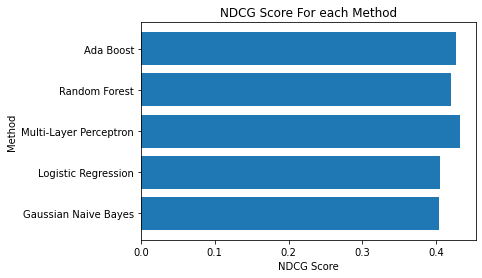

In [44]:
ndcg_names = list(ndcg.keys())
ndcg_values = list(ndcg.values())

plt.barh(range(len(ndcg)),ndcg_values, tick_label=ndcg_names)
plt.title('NDCG Score For each Method')
plt.xlabel('NDCG Score')
plt.ylabel('Method')

plt.show()

In [45]:
print('NDCG Score Values' )
for key, value in ndcg.items():
    print(key, ' : ', value)

NDCG Score Values
Gaussian Naive Bayes  :  0.4039092382196658
Logistic Regression  :  0.4050962760424247
Multi-Layer Perceptron  :  0.43177258628129767
Random Forest  :  0.4196148250310314
Ada Boost  :  0.4271800813871368
